In [1]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import *
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import pyregion
from copy import copy
from glob import glob
import math


In [2]:
table =ascii.read('/Users/arpita/Documents/APL_NEW/outputs/table_clumps_photometry.txt')
table

Image_ID,Clump_ID,z,RA,DEC,mu,mu_err_left,mu_err_right,F090W_Mag,F090W_Mag_err,F150W_Mag,F150W_Mag_err,F200W_Mag,F200W_Mag_err,F277W_Mag,F277W_Mag_err,F356W_Mag,F356W_Mag_err,F444W_Mag,F444W_Mag_err
str5,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
S1.1,C1.1,1.449,110.84069,-73.451065,6.12,0.46,0.57,25.09,0.29,24.39,0.25,24.38,0.17,23.85,0.2,23.7,0.18,23.49,0.19
S1.1,C2.1,1.449,110.840775,-73.451126,6.38,0.46,0.69,25.69,0.37,25.0,0.36,24.6,0.42,23.96,0.24,23.75,0.22,23.6,0.2
S1.1,C3.1,1.449,110.84103,-73.451416,8.05,0.58,0.93,30.17,0.87,28.77,0.4,28.35,0.25,27.89,0.16,27.67,0.12,27.64,0.13
S1.1,C4.1,1.449,110.84191,-73.452255,26.63,2.51,6.9,31.16,0.72,29.15,0.38,29.04,0.13,28.78,0.21,28.67,0.08,28.46,0.13
S1.1,C5.1,1.449,110.84136,-73.45193,14.64,1.13,2.5,31.7,1.01,28.96,0.31,28.81,0.17,28.81,0.31,28.73,0.29,28.63,0.09
S1.1,C6.1,1.449,110.8402,-73.45092,5.61,0.45,0.45,30.15,0.89,29.5,0.32,29.08,0.26,29.6,0.3,30.87,1.28,49.83,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I8.1,C4.1,2.12,110.79055,-73.44696,6.15,0.51,3.59,54.07,45859468.0,29.5,0.27,30.2,0.39,28.9,1.07,29.14,1.13,28.45,1.01
I9.1,C1.1,2.741,110.85982,-73.44423,1.78,0.0,0.1,27.38,0.35,27.6,0.2,27.56,0.25,26.65,0.46,26.55,0.67,26.38,0.65


In [20]:
cat = pd.read_csv('Table_quick_algo_0.cat')
cat = cat.drop('Unnamed: 0', axis = 'columns')
cat

,ID,zmin,zmax,F435W,F606W,F814W,F090W,F105W,F125W,F140W,...,e_F090W,e_F105W,e_F125W,e_F140W,e_F150W,e_F160W,e_F200W,e_F277W,e_F356W,e_F444W
0,I8,2.120,2.120,0.091262,0.123406,0.181702,0.209357,0.226737,0.285235,0.345131,...,0.010468,0.011337,0.014262,0.017257,0.024650,0.019331,0.024433,0.023166,0.020280,0.019646
1,I9,2.742,2.742,0.065677,0.222379,0.248196,0.287958,0.254956,0.269350,0.318501,...,0.014398,0.012748,0.013467,0.015925,0.023380,0.016884,0.031633,0.026924,0.024122,0.024720
2,S8.1,2.690,3.070,-1.000000,-1.000000,-1.000000,0.048904,0.046429,0.055050,0.075735,...,0.002445,0.002321,0.002752,0.003787,0.005063,0.004114,0.005121,0.004385,0.003333,0.002847
3,S8.3,2.690,3.070,-1.000000,-1.000000,-1.000000,0.009354,-1.000000,-1.000000,-1.000000,...,0.000468,-0.050000,-0.050000,-0.050000,0.000807,-0.050000,0.000649,-0.050000,-0.050000,-0.050000
4,S8.2,2.690,3.070,-1.000000,0.043254,-1.000000,0.046850,0.042057,0.052015,0.058857,...,0.002343,0.002103,0.002601,0.002943,0.004720,0.003325,0.004094,0.003217,0.002823,0.002451
5,I10,7.661,7.661,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000
6,S2.2,1.378,1.378,1.054928,1.687860,2.449043,2.855293,3.645867,3.995545,4.130947,...,0.142765,0.182293,0.199777,0.206547,0.245462,0.228861,0.251847,0.291246,0.272665,0.260023
7,S10.1,1.040,1.680,-1.000000,-1.000000,-1.000000,0.032296,0.045670,0.035305,0.030375,...,0.001615,0.002283,0.001765,0.001519,0.002549,0.001713,0.001466,0.001502,0.001097,0.001159
8,S2.3,1.378,1.378,0.071920,0.132978,0.190427,0.221897,0.232832,0.232470,0.228331,...,0.011095,0.011642,0.011624,0.011417,0.017230,0.012344,0.015895,0.017458,0.016683,0.016026
9,S2.1,1.378,1.378,0.193268,0.325340,0.395284,0.531597,0.697557,0.746933,0.741791,...,0.026580,0.034878,0.037347,0.037090,0.042734,0.039591,0.041542,0.049713,0.048970,0.046977


In [11]:
def clump():
    regions =['I8.1','I9.1','S8.1','S8.3','S8.2','I10','S2.2','S10.1','S2.3','S2.1','S10.3'
              ,'S10.2','S4.2','S4.3','S4.1','S1.3','I4','S3.1','I5','S1.2','I7','S3.2'
              ,'S1.1','I2','S5.1','S17.3','S7.3','S7.2','S17.2','I3.1','I1.1','S3.4','S5.2','S7.1','S17.1','S5.3']
    table =ascii.read('/Users/arpita/Documents/APL_NEW/outputs/table_clumps_photometry.txt')
    sum_of_clumps = pd.DataFrame()
    for i in range (0,len(regions)):
    #     for j in range(0,len(table['Image_ID'])):
            C = table[table['Image_ID'] == regions[i]]
            x090= C['F090W_Mag'].tolist()
            x150 = C['F150W_Mag'].tolist()
            x200 = C['F200W_Mag'].tolist()
            x277 = C['F277W_Mag'].tolist()
            x356 = C['F356W_Mag'].tolist()
            x444 = C['F444W_Mag'].tolist()
            sum_clump_090 = sum((10**(np.array(x090)/(-2.5)))*3631)*10e6
            sum_clump_150 = sum((10**(np.array(x150)/(-2.5)))*3631)*10e6
            sum_clump_200 = sum((10**(np.array(x200)/(-2.5)))*3631)*10e6
            sum_clump_277 = sum((10**(np.array(x277)/(-2.5)))*3631)*10e6
            sum_clump_356 = sum((10**(np.array(x356)/(-2.5)))*3631)*10e6
            sum_clump_444 = sum((10**(np.array(x444)/(-2.5)))*3631)*10e6
            new_row = {"Image_ID": regions[i] ,"Clump090":sum_clump_090,"Clump150":sum_clump_150,"Clump200": sum_clump_200,
                       "Clump277": sum_clump_277,"Clump356": sum_clump_356,"Clump444": sum_clump_444,}
            sum_of_clumps = sum_of_clumps.append(new_row, ignore_index=True)


    return sum_of_clumps  

In [27]:
plotvar = clump()
plotvar

/var/folders/31/cd7_8g3d7k17dw6gv1sv4qy80000gn/T/ipykernel_5425/3333219763.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_of_clumps = sum_of_clumps.append(new_row, ignore_index=True)
/var/folders/31/cd7_8g3d7k17dw6gv1sv4qy80000gn/T/ipykernel_5425/3333219763.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_of_clumps = sum_of_clumps.append(new_row, ignore_index=True)
/var/folders/31/cd7_8g3d7k17dw6gv1sv4qy80000gn/T/ipykernel_5425/3333219763.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_of_clumps = sum_of_clumps.append(new_row, ignore_index=True)
/var/folders/31/cd7_8g3d7k17dw6gv1sv4qy80000gn/T/ipykernel_5425/3333219763.py:24: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/31/cd7_8g3d7k17dw6gv1sv4qy80000gn/T/ipykernel_5425/3333219763.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_of_clumps = sum_of_clumps.append(new_row, ignore_index=True)
/var/folders/31/cd7_8g3d7k17dw6gv1sv4qy80000gn/T/ipykernel_5425/3333219763.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_of_clumps = sum_of_clumps.append(new_row, ignore_index=True)
/var/folders/31/cd7_8g3d7k17dw6gv1sv4qy80000gn/T/ipykernel_5425/3333219763.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_of_clumps = sum_of_clumps.append(new_row, ignore_index=True)
/var/folders/31/cd7_8g3d7k17dw6gv1sv4qy80000gn/T/ipykernel_5425/3333219763.py:24: FutureWarning: The frame.append method is deprecated and will be removed

,Image_ID,Clump090,Clump150,Clump200,Clump277,Clump356,Clump444
0,I8.1,1.301239,2.565859,2.084865,2.266083,2.295477,2.562487
1,I9.1,1.412940,1.627010,2.266131,3.486865,3.420546,4.082143
2,S8.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,S8.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,S8.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,I10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,S2.2,7.973351,12.409543,13.659108,20.439236,21.909490,23.128709
7,S10.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,S2.3,2.820160,3.768514,3.626586,3.750907,3.991521,4.587254
9,S2.1,1.664646,2.406516,2.496962,4.000260,4.206748,4.645553


In [24]:
y = np.array((9022.922169659541,15007.45490817801,
              19886.47813979354,27577.9587643848,35682.27763839694,44036.71097714713))

In [28]:
x=np.array((plotvar['Clump090'][1]/cat['F090W'][1],plotvar['Clump150'][1]/cat['F150W'][1],
            plotvar['Clump200'][1]/cat['F200W'][1],plotvar['Clump277'][1]/cat['F277W'][1],
            plotvar['Clump356'][1]/cat['F356W'][1],plotvar['Clump444'][1]/cat['F444W'][1]))

[4.90675153 3.47941754 3.58192155 6.47545019 7.08996247 8.25665579]


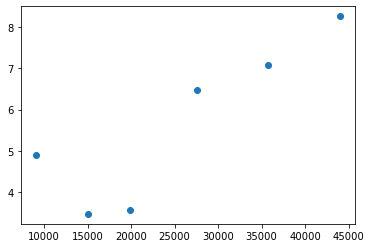

In [29]:
print(x)

plt.scatter(y,x)